# Exercise - Polynomial(Non linear) Regression with semiconductor device I/V plot

The dataset is a plot of current variation of a device based on the voltage applied. The output is non linear in nature. We have to predict current based on voltage with non linear regression. 

### Perform the following operations:

1. Plot the voltage vs current. What degree of polynomial do you think is this?
2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2. 
3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it properly fit or overfit?
4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 

### Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.


In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data.csv')
(df.head())

,voltage,current
0,-1.25,-3.164730
1,-1.20,-2.346773
2,-1.15,-1.305936
3,-1.10,-1.891162
4,-1.05,-1.040983


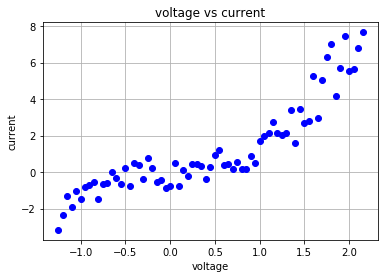

In [11]:
import matplotlib.pyplot as plt
x=df['voltage']
y=df['current']
plt.figure()
plt.plot(x,y,'bo')
plt.title('voltage vs current')
plt.xlabel("voltage")
plt.ylabel("current")
plt.grid()

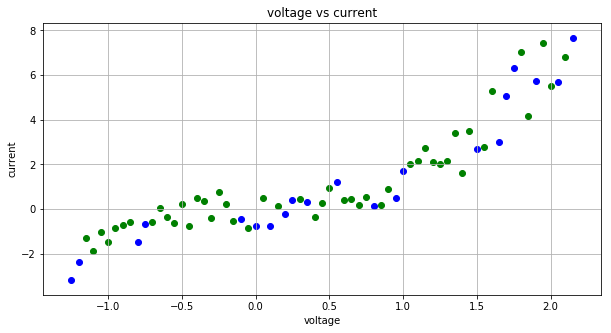

In [4]:
#split the data into training & testing. It should be a 70:30 split with random_state 2. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
plt.figure(figsize=(10,5))

plt.title('voltage vs current')
plt.xlabel("voltage")
plt.ylabel("current")
plt.scatter(x_train,y_train,color='g')
plt.scatter(x_test,y_test,color='b')
#plt.axis([-2,3,-5,10])
plt.grid(True)

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=4)
QuadraticCoeff=poly.fit_transform(x.values.reshape(-1,1))
QuadraticCoeff


array([[ 1.00000000e+00, -1.25000000e+00,  1.56250000e+00,
        -1.95312500e+00,  2.44140625e+00],
       [ 1.00000000e+00, -1.20000000e+00,  1.44000000e+00,
        -1.72800000e+00,  2.07360000e+00],
       [ 1.00000000e+00, -1.15000000e+00,  1.32250000e+00,
        -1.52087500e+00,  1.74900625e+00],
       [ 1.00000000e+00, -1.10000000e+00,  1.21000000e+00,
        -1.33100000e+00,  1.46410000e+00],
       [ 1.00000000e+00, -1.05000000e+00,  1.10250000e+00,
        -1.15762500e+00,  1.21550625e+00],
       [ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -9.50000000e-01,  9.02500000e-01,
        -8.57375000e-01,  8.14506250e-01],
       [ 1.00000000e+00, -9.00000000e-01,  8.10000000e-01,
        -7.29000000e-01,  6.56100000e-01],
       [ 1.00000000e+00, -8.50000000e-01,  7.22500000e-01,
        -6.14125000e-01,  5.22006250e-01],
       [ 1.00000000e+00, -8.00000000e-01,  6.40000000e-01,
        -5.12000000e-01

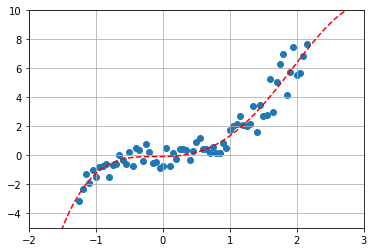

In [6]:
Pmodel=LinearRegression()
Pmodel.fit(QuadraticCoeff,y)


xx=np.linspace(-2,3,100).reshape(-1,1)
xx_quadratic= poly.fit_transform(xx)

plt.axis([-2,3,-5,10])
plt.grid()
plt.plot(xx,Pmodel.predict(xx_quadratic),c='r',linestyle='--')
plt.scatter(x,y)
plt.show()

In [7]:
for i in range(len(y)):
    print("Expected:{0},predicted:{1}".format(y[i],(Pmodel.predict(QuadraticCoeff)[i])))
          

Expected:-3.164730011,predicted:-2.665971104341403
Expected:-2.346773348,predicted:-2.3190283144465917
Expected:-1.305936053,predicted:-2.0063784502790205
Expected:-1.891161742,predicted:-1.7259196431653523
Expected:-1.040983282,predicted:-1.475600221110888
Expected:-1.468561566,predicted:-1.2534187087995787
Expected:-0.836265755,predicted:-1.0574238275940173
Expected:-0.7060683990000001,predicted:-0.8857144955354415
Expected:-0.565332976,predicted:-0.7364398273437314
Expected:-1.488503284,predicted:-0.6077991344174138
Expected:-0.6714746559999999,predicted:-0.49804192483365756
Expected:-0.581898154,predicted:-0.40546790334827676
Expected:0.034007664,predicted:-0.32842697139573
Expected:-0.34526394299999996,predicted:-0.2653192270891187
Expected:-0.624779004,predicted:-0.21459496522018975
Expected:0.210056865,predicted:-0.17475467725933336
Expected:-0.7500315409999999,predicted:-0.14434905135558437
Expected:0.511142716,predicted:-0.12197897233662161
Expected:0.374613205,predicted:-0.10

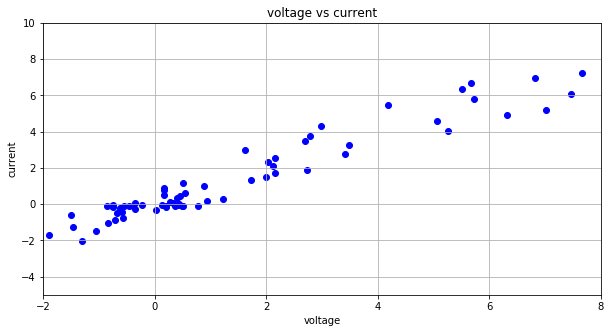

In [8]:
#Predict the output for test dataset, and plot a scatter of test output vs obtained output.
plt.figure(figsize=(10,5))

plt.title('voltage vs current')
plt.xlabel("voltage")
plt.ylabel("current")
plt.scatter(y,Pmodel.predict(QuadraticCoeff),color='b')
plt.axis([-2,8,-5,10])
plt.grid(True)

In [14]:
#Obtain MSE and R^2 score
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y,Pmodel.predict(QuadraticCoeff),multioutput='uniform_average')
print("MSE",mse)

MSE 0.43592474769493367


In [13]:
from sklearn.metrics import r2_score
Pmodel.score(QuadraticCoeff,y)

0.9299753978974236